<a href="https://colab.research.google.com/github/Priyanshu27083/ML_lab/blob/main/pima_diabetes_ML_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/diabetes.csv")
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Outcome',axis = 1), data['Outcome'], test_size = 0.2, random_state = 0)
for col in data.columns:
    print(col, (data[col]==0).sum())

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


In [4]:
zero_cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

# Compute medians from training set only
medians = {}
for col in zero_cols:
    medians[col] = X_train[col].median()
    X_train[col] = X_train[col].replace(0, medians[col])
    X_test[col] = X_test[col].replace(0, medians[col])

for col in X_train.columns:
    print(col, (X_train[col]==0).sum())


Pregnancies 95
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0
DiabetesPedigreeFunction 0
Age 0


The objective of logistic regression with L2 regularization is to minimize a penalized loss function, which is the negative log-likelihood of the data plus a penalty term proportional to the sum of the squared coefficients. This combination of objectives helps to prevent overfitting by discouraging overly large coefficients, leading to a simpler, more generalized model that performs better on unseen data.

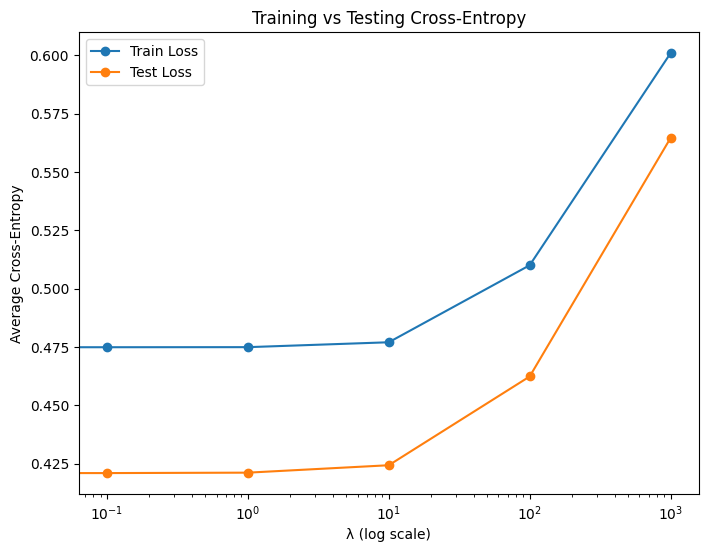

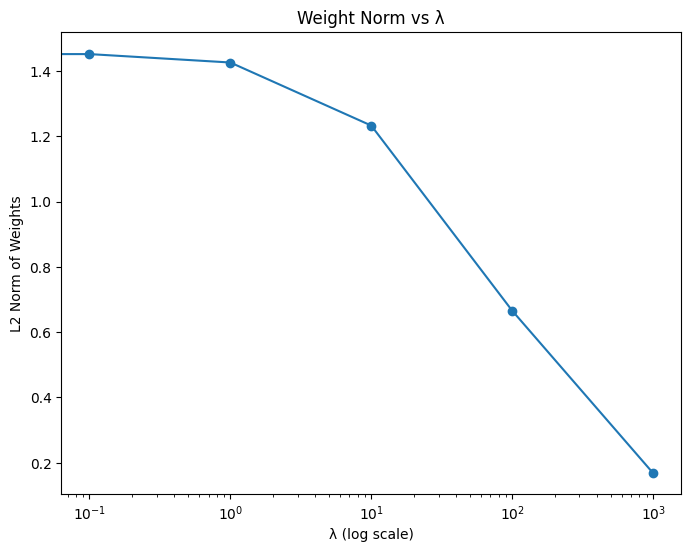

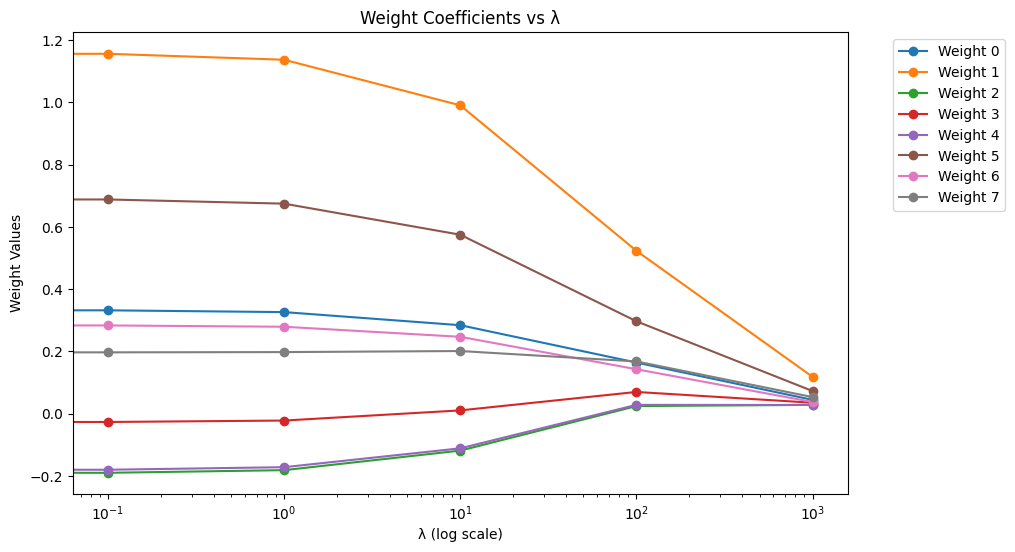

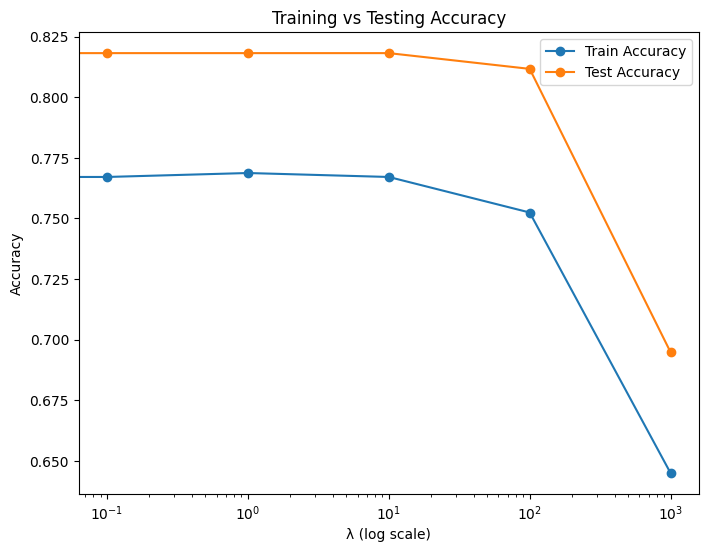

In [5]:
#d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score

# Different values of regularization (λ)
lambdas = [0, 0.1, 1, 10, 100, 1000]

# Empty lists to save results
train_losses, test_losses = [], []
train_accs, test_accs = [], []
weights, weight_norms = [], []

# Scale the data so all features are on similar size
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and test for each λ
for lam in lambdas:
    if lam == 0:
        model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=1000)
    else:
        model = LogisticRegression(penalty="l2", C=1/lam, solver="lbfgs", max_iter=1000)

    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict_proba(X_train_scaled)[:, 1]
    y_test_pred = model.predict_proba(X_test_scaled)[:, 1]

    # Cross-entropy loss
    train_losses.append(log_loss(y_train, y_train_pred))
    test_losses.append(log_loss(y_test, y_test_pred))

    # Accuracy
    train_accs.append(accuracy_score(y_train, (y_train_pred > 0.5).astype(int)))
    test_accs.append(accuracy_score(y_test, (y_test_pred > 0.5).astype(int)))

    # Weights and L2 norm
    w = model.coef_.flatten()
    weights.append(w)
    weight_norms.append(np.linalg.norm(w, 2))

# Convert list to numpy array for plotting
weights = np.array(weights)

# Plot 1: Cross-Entropy (Train vs Test)
plt.figure(figsize=(8,6))
plt.plot(lambdas, train_losses, marker='o', label="Train Loss")
plt.plot(lambdas, test_losses, marker='o', label="Test Loss")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Average Cross-Entropy")
plt.title("Training vs Testing Cross-Entropy")
plt.legend()
plt.show()

# Plot 2: L2 Norm of Weights
plt.figure(figsize=(8,6))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm of Weights")
plt.title("Weight Norm vs λ")
plt.show()

# Plot 3: Weight Values
plt.figure(figsize=(10,6))
for j in range(weights.shape[1]):
    plt.plot(lambdas, weights[:, j], marker='o', label=f'Weight {j}')
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Weight Values")
plt.title("Weight Coefficients vs λ")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot 4: Accuracy (Train vs Test)
plt.figure(figsize=(8,6))
plt.plot(lambdas, train_accs, marker='o', label="Train Accuracy")
plt.plot(lambdas, test_accs, marker='o', label="Test Accuracy")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy")
plt.legend()
plt.show()


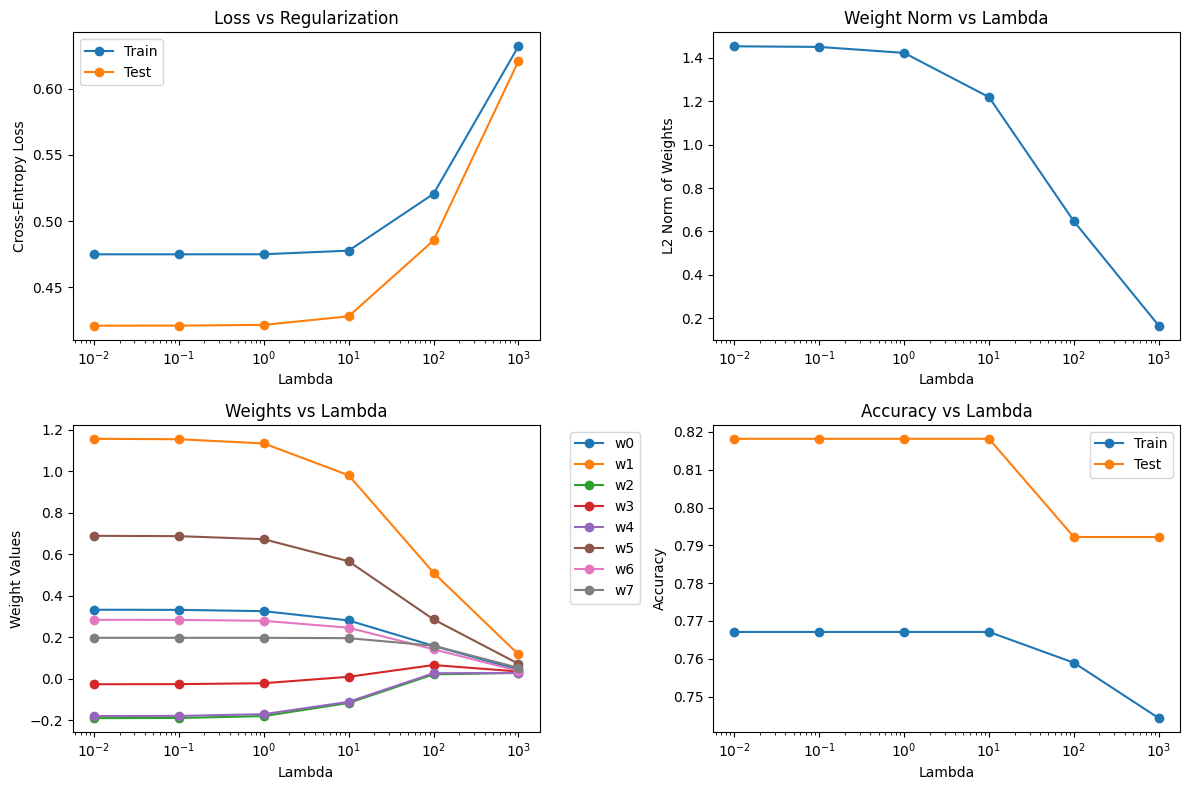

In [7]:
# Try different lambdas (regularization strengths)
lambdas = [0.01, 0.1, 1, 10, 100, 1000]

train_losses, test_losses = [], []
train_accs, test_accs = [], []
weights = []

for lam in lambdas:
    model = LogisticRegression(
        penalty="l2",
        C=1/lam,
        solver="liblinear",
        max_iter=1000
    )
    model.fit(X_train_scaled, y_train)

    y_train_prob = model.predict_proba(X_train_scaled)
    y_test_prob = model.predict_proba(X_test_scaled)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))
    train_accs.append(accuracy_score(y_train, y_train_pred))
    test_accs.append(accuracy_score(y_test, y_test_pred))
    weights.append(model.coef_[0])

# === Plotting ===
plt.figure(figsize=(12,8))

# Loss
plt.subplot(2,2,1)
plt.plot(lambdas, train_losses, marker="o", label="Train")
plt.plot(lambdas, test_losses, marker="o", label="Test")
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Cross-Entropy Loss")
plt.title("Loss vs Regularization")
plt.legend()

# Weight norm
plt.subplot(2,2,2)
plt.plot(lambdas, [np.linalg.norm(w) for w in weights], marker="o")
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("L2 Norm of Weights")
plt.title("Weight Norm vs Lambda")

# Individual weights
plt.subplot(2,2,3)
for i in range(X_train_scaled.shape[1]):
    plt.plot(lambdas, [w[i] for w in weights], marker="o", label=f"w{i}")
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Weight Values")
plt.title("Weights vs Lambda")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Accuracy
plt.subplot(2,2,4)
plt.plot(lambdas, train_accs, marker="o", label="Train")
plt.plot(lambdas, test_accs, marker="o", label="Test")
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Lambda")
plt.legend()

plt.tight_layout()
plt.show()

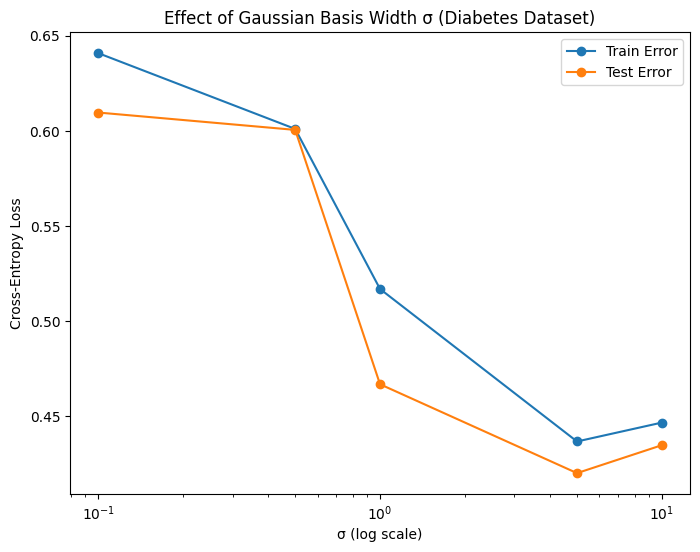

In [8]:
# Gaussian basis function for one feature column
def gaussian_basis(x, mus, sigma):
    return np.exp(- (x[:, None] - mus)**2 / (2 * sigma**2))

# Expand all features in X with Gaussian bases
def expand_features(X, sigma, n_basis=5):
    mus = np.linspace(-10, 10, n_basis)   # pick 5 means between -10 and 10
    expanded = [gaussian_basis(X[:, j], mus, sigma) for j in range(X.shape[1])]
    return np.hstack(expanded)            # join them together

# Try different sigma values
sigmas = [0.1, 0.5, 1, 5, 10]
train_errors, test_errors = [], []

for sigma in sigmas:
    # expand train and test features with Gaussian basis
    X_train_g = expand_features(X_train_scaled, sigma)
    X_test_g = expand_features(X_test_scaled, sigma)

    # train logistic regression without regularization
    model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=2000)
    model.fit(X_train_g, y_train)

    # predict probabilities
    y_train_pred = model.predict_proba(X_train_g)[:, 1]
    y_test_pred = model.predict_proba(X_test_g)[:, 1]

    # compute log-loss (cross-entropy error)
    train_errors.append(log_loss(y_train, y_train_pred))
    test_errors.append(log_loss(y_test, y_test_pred))

# plot results
plt.figure(figsize=(8,6))
plt.plot(sigmas, train_errors, marker="o", label="Train Error")
plt.plot(sigmas, test_errors, marker="o", label="Test Error")
plt.xscale("log")
plt.xlabel("σ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Effect of Gaussian Basis Width σ (Diabetes Dataset)")
plt.legend()
plt.show()


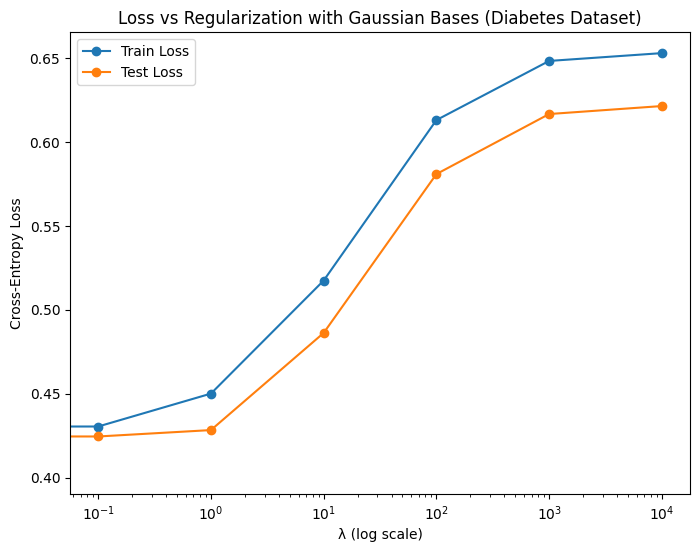

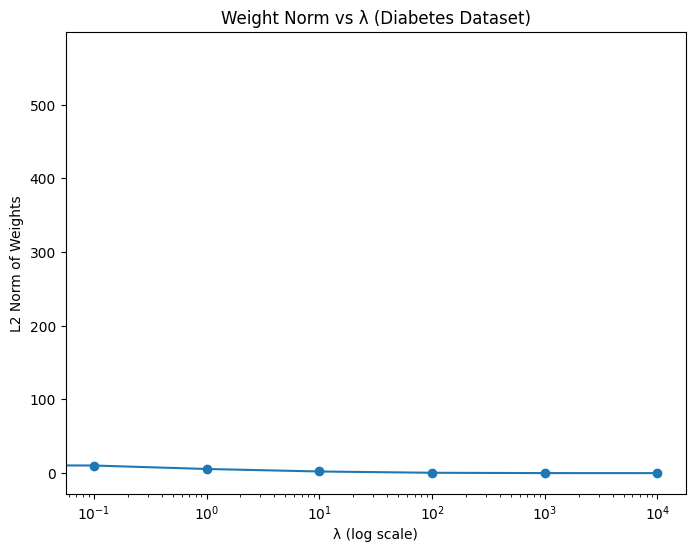

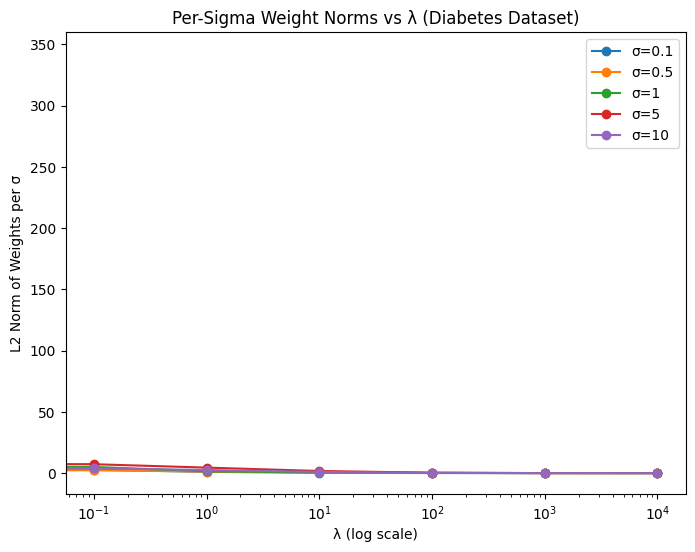

In [9]:
# Expand features for all sigmas together
def expand_all_sigmas(X, sigmas):
    expanded = [expand_features(X, sigma) for sigma in sigmas]
    return np.hstack(expanded)

X_train_all = expand_all_sigmas(X_train_scaled, sigmas)
X_test_all = expand_all_sigmas(X_test_scaled, sigmas)

# Regularization parameters
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]
train_losses, test_losses, weight_norms = [], [], []
sigma_weight_norms = {sigma: [] for sigma in sigmas}

for lam in lambdas:
    # logistic regression with or without L2 penalty
    if lam == 0:
        model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=5000)
    else:
        model = LogisticRegression(penalty="l2", C=1/lam, solver="lbfgs", max_iter=5000)

    model.fit(X_train_all, y_train)

    # predictions
    y_train_pred = model.predict_proba(X_train_all)[:, 1]
    y_test_pred = model.predict_proba(X_test_all)[:, 1]

    # losses
    train_losses.append(log_loss(y_train, y_train_pred))
    test_losses.append(log_loss(y_test, y_test_pred))

    # overall weight norm
    weight_norms.append(np.linalg.norm(model.coef_))

    # per-sigma weight norms
    start = 0
    for sigma in sigmas:
        block_size = X_train_scaled.shape[1] * 5   # 5 basis functions per feature
        sigma_weights = model.coef_[0, start:start+block_size]
        sigma_weight_norms[sigma].append(np.linalg.norm(sigma_weights))
        start += block_size

# === Plot losses ===
plt.figure(figsize=(8,6))
plt.plot(lambdas, train_losses, marker="o", label="Train Loss")
plt.plot(lambdas, test_losses, marker="o", label="Test Loss")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Loss vs Regularization with Gaussian Bases (Diabetes Dataset)")
plt.legend()
plt.show()

# === Plot overall weight norms ===
plt.figure(figsize=(8,6))
plt.plot(lambdas, weight_norms, marker="o")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm of Weights")
plt.title("Weight Norm vs λ (Diabetes Dataset)")
plt.show()

# === Plot per-sigma weight norms ===
plt.figure(figsize=(8,6))
for sigma in sigmas:
    plt.plot(lambdas, sigma_weight_norms[sigma], marker="o", label=f"σ={sigma}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm of Weights per σ")
plt.title("Per-Sigma Weight Norms vs λ (Diabetes Dataset)")
plt.legend()
plt.show()


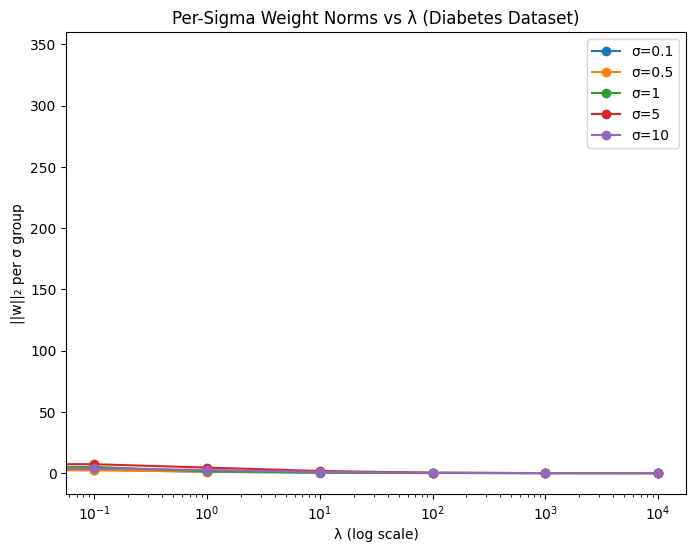

In [11]:
# Plot per-sigma weight norms vs lambda
plt.figure(figsize=(8,6))
for sigma in sigmas:
    plt.plot(lambdas, sigma_weight_norms[sigma], marker="o", label=f"σ={sigma}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("||w||₂ per σ group")
plt.title("Per-Sigma Weight Norms vs λ (Diabetes Dataset)")
plt.legend()
plt.show()


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_auc_score, RocCurveDisplay

# Make plots look better
plt.style.use("seaborn-v0_8")

# Load Pima Diabetes dataset
# (make sure diabetes.csv is in your working directory)
data = pd.read_csv("diabetes.csv")

# Features (X) and Target (y)
X = data.drop("Outcome", axis=1)   # input features
y = data["Outcome"]                # target label (0 = no diabetes, 1 = diabetes)

print("Shape of features:", X.shape)
print("Shape of target:", y.shape)

# Show first few rows
X.head()


Shape of features: (768, 8)
Shape of target: (768,)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
# Split dataset into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)


Training set shape: (614, 8)
Testing set shape: (154, 8)


In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

# Evaluation
print("Linear Regression Results:")
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("R² Score (Train):", r2_score(y_train, y_train_pred))
print("R² Score (Test):", r2_score(y_test, y_test_pred))


Linear Regression Results:
Train MSE: 0.15744485172625472
Test MSE: 0.17104527280850101
R² Score (Train): 0.30506972801106247
R² Score (Test): 0.25500281176741757


In [15]:
ridge = Ridge(alpha=10)  # alpha = λ
ridge.fit(X_train_scaled, y_train)

y_test_pred_ridge = ridge.predict(X_test_scaled)

print("Ridge Regression Test MSE:", mean_squared_error(y_test, y_test_pred_ridge))
print("Ridge Regression R² (Test):", r2_score(y_test, y_test_pred_ridge))


Ridge Regression Test MSE: 0.17068479034471545
Ridge Regression R² (Test): 0.2565729131652392


In [16]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_test_pred_lasso = lasso.predict(X_test_scaled)

print("Lasso Regression Test MSE:", mean_squared_error(y_test, y_test_pred_lasso))
print("Lasso Regression R² (Test):", r2_score(y_test, y_test_pred_lasso))


Lasso Regression Test MSE: 0.18430487893995587
Lasso Regression R² (Test): 0.19724986061708094


In [20]:
# Use the original 'Outcome' for classification
y_class = data["Outcome"]

# Train-Test split again for classification
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

print("Class distribution:", np.bincount(y_class))

Class distribution: [500 268]


Class distribution: [500 268]
Logistic Regression Accuracy: 0.7532467532467533


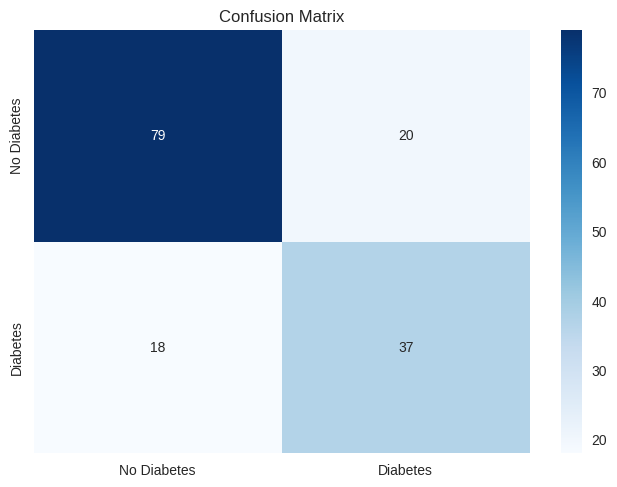

ROC-AUC Score: 0.8146923783287419


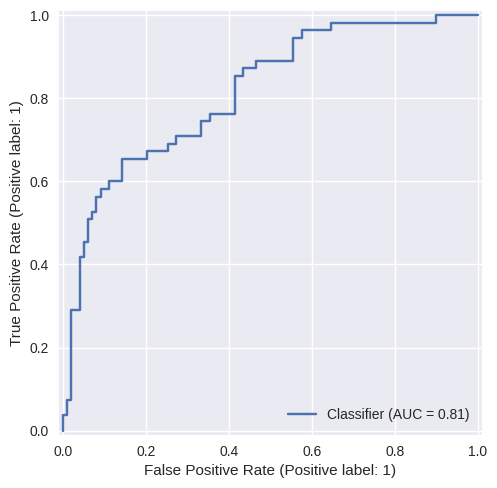

In [21]:
# Use the Outcome column directly (already 0 or 1)
y_class = data["Outcome"].values
X_class = data.drop("Outcome", axis=1)

# Train-Test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

print("Class distribution:", np.bincount(y_class))

# Logistic Regression
log_reg = LogisticRegression(C=1.0, penalty="l2", solver="lbfgs", max_iter=1000)
log_reg.fit(X_train_c_scaled, y_train_c)

# Predictions
y_pred_c = log_reg.predict(X_test_c_scaled)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test_c, y_pred_c))

# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["No Diabetes", "Diabetes"],
    yticklabels=["No Diabetes", "Diabetes"]
)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_proba = log_reg.predict_proba(X_test_c_scaled)[:, 1]
roc_auc = roc_auc_score(y_test_c, y_proba)
print("ROC-AUC Score:", roc_auc)

RocCurveDisplay.from_predictions(y_test_c, y_proba)
plt.show()
